Each task that is proposed to be completed as part of the homework has a declared "price" in points. The maximum possible amount is 10 points, and together with the bonus assignment - 12 points. It is not necessary to complete all the tasks, only a part can be done. Most of the points expect you to write working Python code; sometimes you will need to write comments - for example, to compare several approaches to solve the same problem. Also you can add more cells for your convenience if you need.

This homework focuses on clustering. We will work with images of handwritten digits, learn how to cluster them using two different methods (hierarchical clustering and the 𝐾-means algorithm), evaluate the quality of the partition and choose the optimal number of clusters, as well as visualize intermediate results.

## 1. Loading data
The data we will be working with is available in the scikit-learn library (`sklearn` module) in the `datasets` submodule via the `load_digits` function. The data contains 1,797 observations, each of which is 8×8 pixel image of a handwritten digit from 0 to 9. This is about the same amount of each digit (about 180).

For convenience, every image expands to a 64 (8×8) row, so entire numpy array is 1797×64. The color intensity in each pixel is encoded with an integer from 0 to 16.

In addition to images, their labels are also known. In this task, we will assume that the labels (as well as their amount) are unknown and try to group the data in such a way that the resulting clusters 'better match' the original ones. Possible options for determining the 'better match' are presented later.

**(0.25 points)** Load the images into `X` variable, and their labels into `y` variable.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

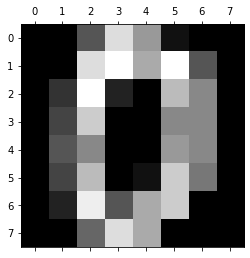

In [2]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [3]:
X, y = digits["data"], digits["target"]

In [4]:
assert X.shape == (1797, 64)
assert y.shape == (1797,)

**(0.5 points)** Visualize the first 10 images.

- Arrange images on a grid rather than in a row. You may need the `subplot` and `imshow` functions from the `pyplot` module in the `matplotlib` library.
- You will also need to reshape the images to 8×8.
- Remove ticks and labels from both axes. The `xticks` and `yticks` functions or the `tick_params` function from `pyplot` can help you with this.
- Make the output good sized with the `figure` function from `pyplot`.

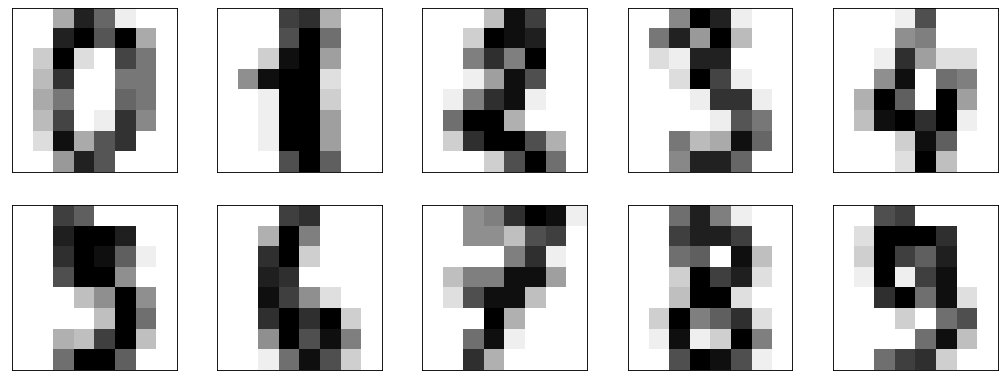

In [5]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16, 6), dpi=80)

for i in range(10):
    plt.subplot(2, 5, i + 1, xticks=[], yticks=[])
    plt.imshow(digits.images[i,:].reshape([8,8]), cmap=plt.cm.gray_r, interpolation='nearest')

## 2. Clustering and quality evaluation

**(2 points)** Implement the the KMeans algorithm. Use objective function $L = \sum_{i=1}^{n}|x_{i}-Z_{A(x_{i})}|^{2}$, where $Z_{A(x_{i})}$ is the center of the cluster corresponding to $x_{i}$ object.

In [6]:
from sklearn.exceptions import NotFittedError
from numpy.random import RandomState

**(1 points)** Get the `X` array partition into 10 clusters. Visualize the centers of clusters.
- We will assume that the center of the cluster is average value of all observations belonging to the cluster.
- The cluster centers should have the same shape as our observations (64). So you have to average the points across the rows.

In [7]:
from sklearn import cluster
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)
kmeans = cluster.KMeans(n_clusters= 10)
custom_kmeans_labels = kmeans.fit_predict(X_reduced)
assert custom_kmeans_labels.shape == (1797,)

Text(0.5, 1.0, 'Digits data. Kmeans clusters')

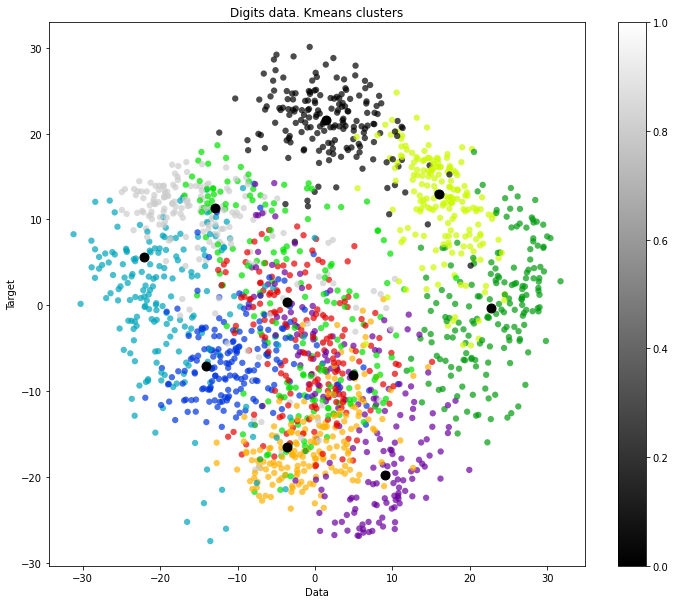

In [8]:
from sklearn import cluster
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)
kmeans = cluster.KMeans(n_clusters= 10)
custom_kmeans_labels = kmeans.fit_predict(X_reduced)

centroids = kmeans.cluster_centers_
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.colorbar()
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Digits data. Kmeans clusters')

Отсортируем кластеры по уникальности и покажем центры кластеров

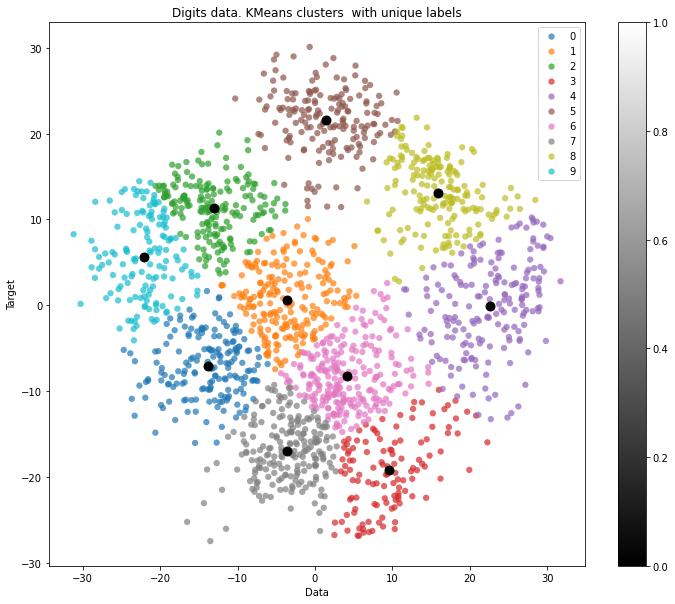

In [9]:
from sklearn import cluster
from sklearn import decomposition
import numpy as np

pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)
kmeans = cluster.KMeans(n_clusters= 10)
custom_kmeans_labels = kmeans.fit_predict(X_reduced)
centroids = kmeans.cluster_centers_
unique_labels = np.unique(custom_kmeans_labels)
plt.figure(figsize=(12,10))
for i in unique_labels:
    plt.scatter(X_reduced[custom_kmeans_labels==i, 0], X_reduced[custom_kmeans_labels==i, 1], 
                label=i, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.colorbar()
plt.title('Digits data. KMeans clusters  with unique labels')
plt.show()

**(0.5 points)** Experiment with `max_iter` and `n_init` parameters. Look at the range of values of the objective function, it's best values, at what parameters and how often they are achieved.

For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). 

$WCSS = \sum_{i\in n}^{}(X_{i}-Y_{i})^{2}$

Yi is centroid for observation Xi.

WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

Determinging the Number of Clusters
Determining the optimal number of clusters is one of the most important prerequisites for certain classes of clustering algorithms such as k-means clustering. Such algorithms require the user to specify the number of clusters manually. There are several approaches for determing the number of clusters. We will see two such important methods.

Elbow Method
Silhouette Method
Elbow Method
The Elbow method looks at the total Within Cluster Sum Of Squares(WSS) as a function of the number of clusters. The optimal number of clusters will be the one after which any further addition of another cluster doesn’t improve the total WSS for all clusters put together or significantly so.

In order to use the elbow method, try k-means cluster for n_clusters ranging from say 1 to N (say 10) and plot the total WSS against the number of clusters. In the plot where the elbow (or knee or simply the bent) is found, the WSS flattens as we add more clusters. Such a point gives us the optimal number of clusters.

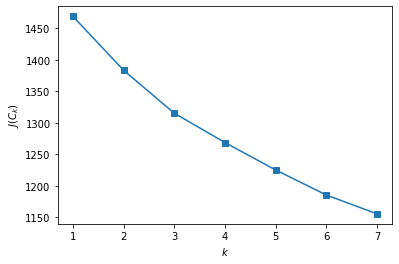

In [10]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [11]:
from sklearn import cluster
wcss = []
for i in range(4, 30): 
    kmeans = cluster.KMeans(n_clusters = 10, init = 'k-means++', random_state = 42, n_init= i)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

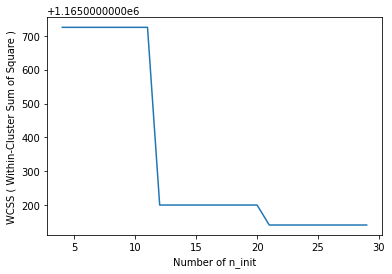

In [12]:
plt.plot(range(4, 30), wcss)
plt.xlabel('Number of n_init')
plt.ylabel('WCSS ( Within-Cluster Sum of Square )') 
plt.show()

Оптимальный n_unit = 21

In [13]:
from sklearn import cluster
wcss_iter = [] 
for i in range(100, 500): 
    kmeans = cluster.KMeans(n_clusters = 10, init = 'k-means++', random_state = 42, n_init= 21, max_iter=i)
    kmeans.fit(X) 
    wcss_iter.append(kmeans.inertia_)

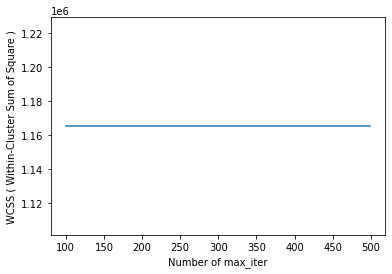

In [14]:
plt.plot(range(100, 500), wcss_iter)
plt.xlabel('Number of max_iter')
plt.ylabel('WCSS ( Within-Cluster Sum of Square )') 
plt.show()

WCSS Within-Cluster Sum of Square не зависит от max_iter

In [15]:
from sklearn.cluster import KMeans
wcss_clusters = [] 
for i in range(5, 21): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss_clusters.append(kmeans.inertia_)

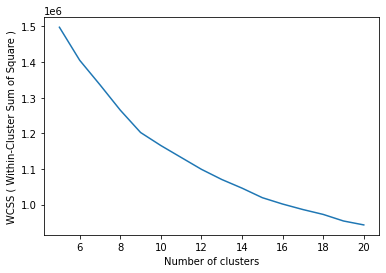

In [16]:
plt.plot(range(5, 21), wcss_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS ( Within-Cluster Sum of Square )') 
plt.show()

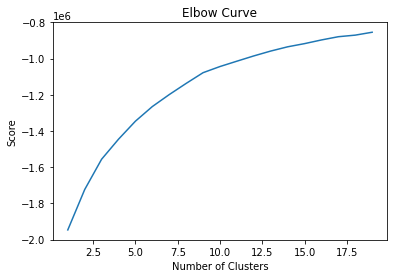

In [17]:
from sklearn.model_selection import train_test_split
X_train, x_test = train_test_split(X, train_size=0.9)
n_clusters = range(1,20)
kmeans = [cluster.KMeans(n_clusters=i, init='k-means++', n_init=10,max_iter=300, tol=0.0001, 
                         verbose=0, random_state=None, copy_x=True)
        for i in n_clusters]
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
plt.plot(n_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Проверим на меньшем количестве кластеров.

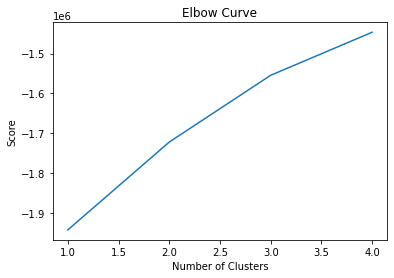

In [18]:
X_train, x_test = train_test_split(X, train_size=0.9)
n_clusters = range(1,5)
kmeans = [cluster.KMeans(n_clusters=i, init='k-means++', n_init=10,max_iter=300, tol=0.0001, 
                         verbose=0, random_state=None, copy_x=True)
        for i in n_clusters]
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
plt.plot(n_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In the above plot, you can observe the knee starts between 2 and 3. A larger bend is around 2.5. Hence k=2 would be the optimal number of clusters.

Посмотрим, измениться ли score, если поменять n_unit и max_iter

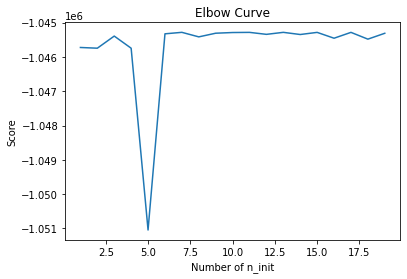

In [19]:
X_train, x_test = train_test_split(X, train_size=0.9)
n_init = range(1,20)
kmeans = [cluster.KMeans(n_clusters=10, init='k-means++', n_init=i, max_iter=300, tol=0.0001, 
                         verbose=0, random_state=None, copy_x=True)
        for i in n_init]
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
plt.plot(n_init,score)
plt.xlabel('Number of n_init')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


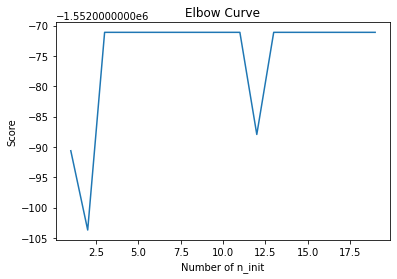

In [20]:
X_train, x_test = train_test_split(X, train_size=0.9)
n_init = range(1,20)
kmeans = [cluster.KMeans(n_clusters=3, init='k-means++', n_init=i, max_iter=300, tol=0.0001, 
                         verbose=0, random_state=None, copy_x=True)
        for i in n_init]
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
plt.plot(n_init,score)
plt.xlabel('Number of n_init')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


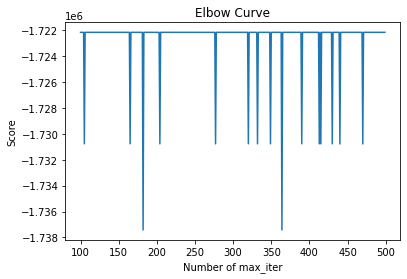

In [21]:
X_train, x_test = train_test_split(X, train_size=0.9)
max_iter = range(100,500)
kmeans = [cluster.KMeans(n_clusters=2, init='k-means++', n_init=8, max_iter=i, tol=0.0001, 
                         verbose=0, random_state=None, copy_x=True)
        for i in max_iter]
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
plt.plot(max_iter,score)
plt.xlabel('Number of max_iter')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

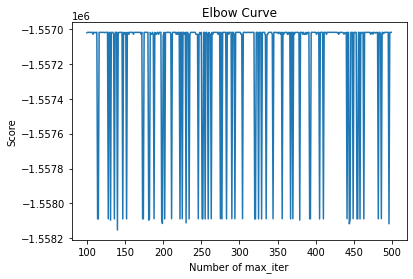

In [22]:
X_train, x_test = train_test_split(X, train_size=0.9)
max_iter = range(100,500)
kmeans = [cluster.KMeans(n_clusters=3, init='k-means++', n_init=8, max_iter=i, tol=0.0001, 
                         verbose=0, random_state=None, copy_x=True)
        for i in max_iter]
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
plt.plot(max_iter,score)
plt.xlabel('Number of max_iter')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

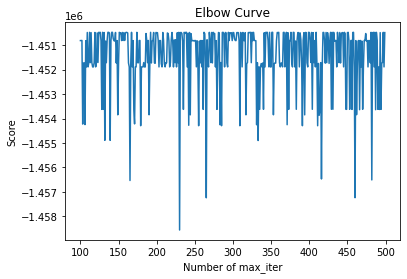

In [23]:
X_train, x_test = train_test_split(X, train_size=0.9)
max_iter = range(100,500)
kmeans = [cluster.KMeans(n_clusters=4, init='k-means++', n_init=8, max_iter=i, tol=0.0001, 
                         verbose=0, random_state=None, copy_x=True)
        for i in max_iter]
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
plt.plot(max_iter,score)
plt.xlabel('Number of max_iter')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [24]:

from sklearn import cluster
from sklearn.metrics import silhouette_score

kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit_predict(X)
score = silhouette_score(X, kmeans.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.182


In [25]:
range_n_clusters = range(10,30)
for n_clusters in range_n_clusters:
    kmeans = cluster.KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 10, silhouette score is 0.18248006861640761)
For n_clusters = 11, silhouette score is 0.18286226602751776)
For n_clusters = 12, silhouette score is 0.1828747755716302)
For n_clusters = 13, silhouette score is 0.18576431826501075)
For n_clusters = 14, silhouette score is 0.1880027661028677)
For n_clusters = 15, silhouette score is 0.1830238047554513)
For n_clusters = 16, silhouette score is 0.17890092724116274)
For n_clusters = 17, silhouette score is 0.16860831033095042)
For n_clusters = 18, silhouette score is 0.1553852350994564)
For n_clusters = 19, silhouette score is 0.16440434937407455)
For n_clusters = 20, silhouette score is 0.17226986574844)
For n_clusters = 21, silhouette score is 0.17156135090459665)
For n_clusters = 22, silhouette score is 0.17397319543505582)
For n_clusters = 23, silhouette score is 0.1518284522392364)
For n_clusters = 24, silhouette score is 0.1675670899088978)
For n_clusters = 25, silhouette score is 0.14357507796045263)
For n_clusters = 

Silhouette Method
The silhouette method computes the average silhouette score of observations for different values of n_clusters. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k (n_clusters). This algorithm is similar to the elbow method, but differs in the computation of silhuette score.

The Silhouette Coefficient is a metric to estimate the optimum number of clusters. It uses average intra-cluster distance and average nearest-cluster distance for each sample. Higher the value of the score, the better the estimate. Typically the silhoutte scores go high and then fall peaking at an optimum cluster number. The values lie between -1.0 and 1.0.

For n_clusters=2, Silhouetee Coefficient = 0.11832841100655983
For n_clusters=3, Silhouetee Coefficient = 0.12649498093440542
For n_clusters=4, Silhouetee Coefficient = 0.1284287263314014
For n_clusters=5, Silhouetee Coefficient = 0.13620788898519476
For n_clusters=6, Silhouetee Coefficient = 0.15101736770419857
For n_clusters=7, Silhouetee Coefficient = 0.16427629629289187
For n_clusters=8, Silhouetee Coefficient = 0.17870872376692565
For n_clusters=9, Silhouetee Coefficient = 0.18934714154566035
For n_clusters=10, Silhouetee Coefficient = 0.18226917448066454
For n_clusters=11, Silhouetee Coefficient = 0.18310131190390433
For n_clusters=12, Silhouetee Coefficient = 0.18280732292435245
For n_clusters=13, Silhouetee Coefficient = 0.18550764633625244
For n_clusters=14, Silhouetee Coefficient = 0.18816730752150698
For n_clusters=15, Silhouetee Coefficient = 0.19102428680755226
For n_clusters=16, Silhouetee Coefficient = 0.18055413331172002
For n_clusters=17, Silhouetee Coefficient = 0.177

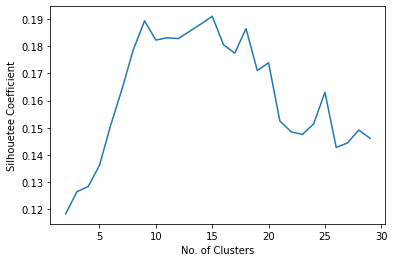

Optimum Number ofClusters: 15


In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

k_clusters = []
sil_coeffecients = []

for n_cluster in range(2,30):
    kmeans = cluster.KMeans(n_clusters = n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label)
    print("For n_clusters={}, Silhouetee Coefficient = {}".format(n_cluster, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(n_cluster)

plt.plot(k_clusters,sil_coeffecients)
plt.ylabel('Silhouetee Coefficient'), plt.xlabel('No. of Clusters')
plt.show()

sil_best = max(sil_coeffecients)
k_best_index=sil_coeffecients.index(sil_best)
k_best = k_clusters[k_best_index]
print("Optimum Number ofClusters:", k_best)

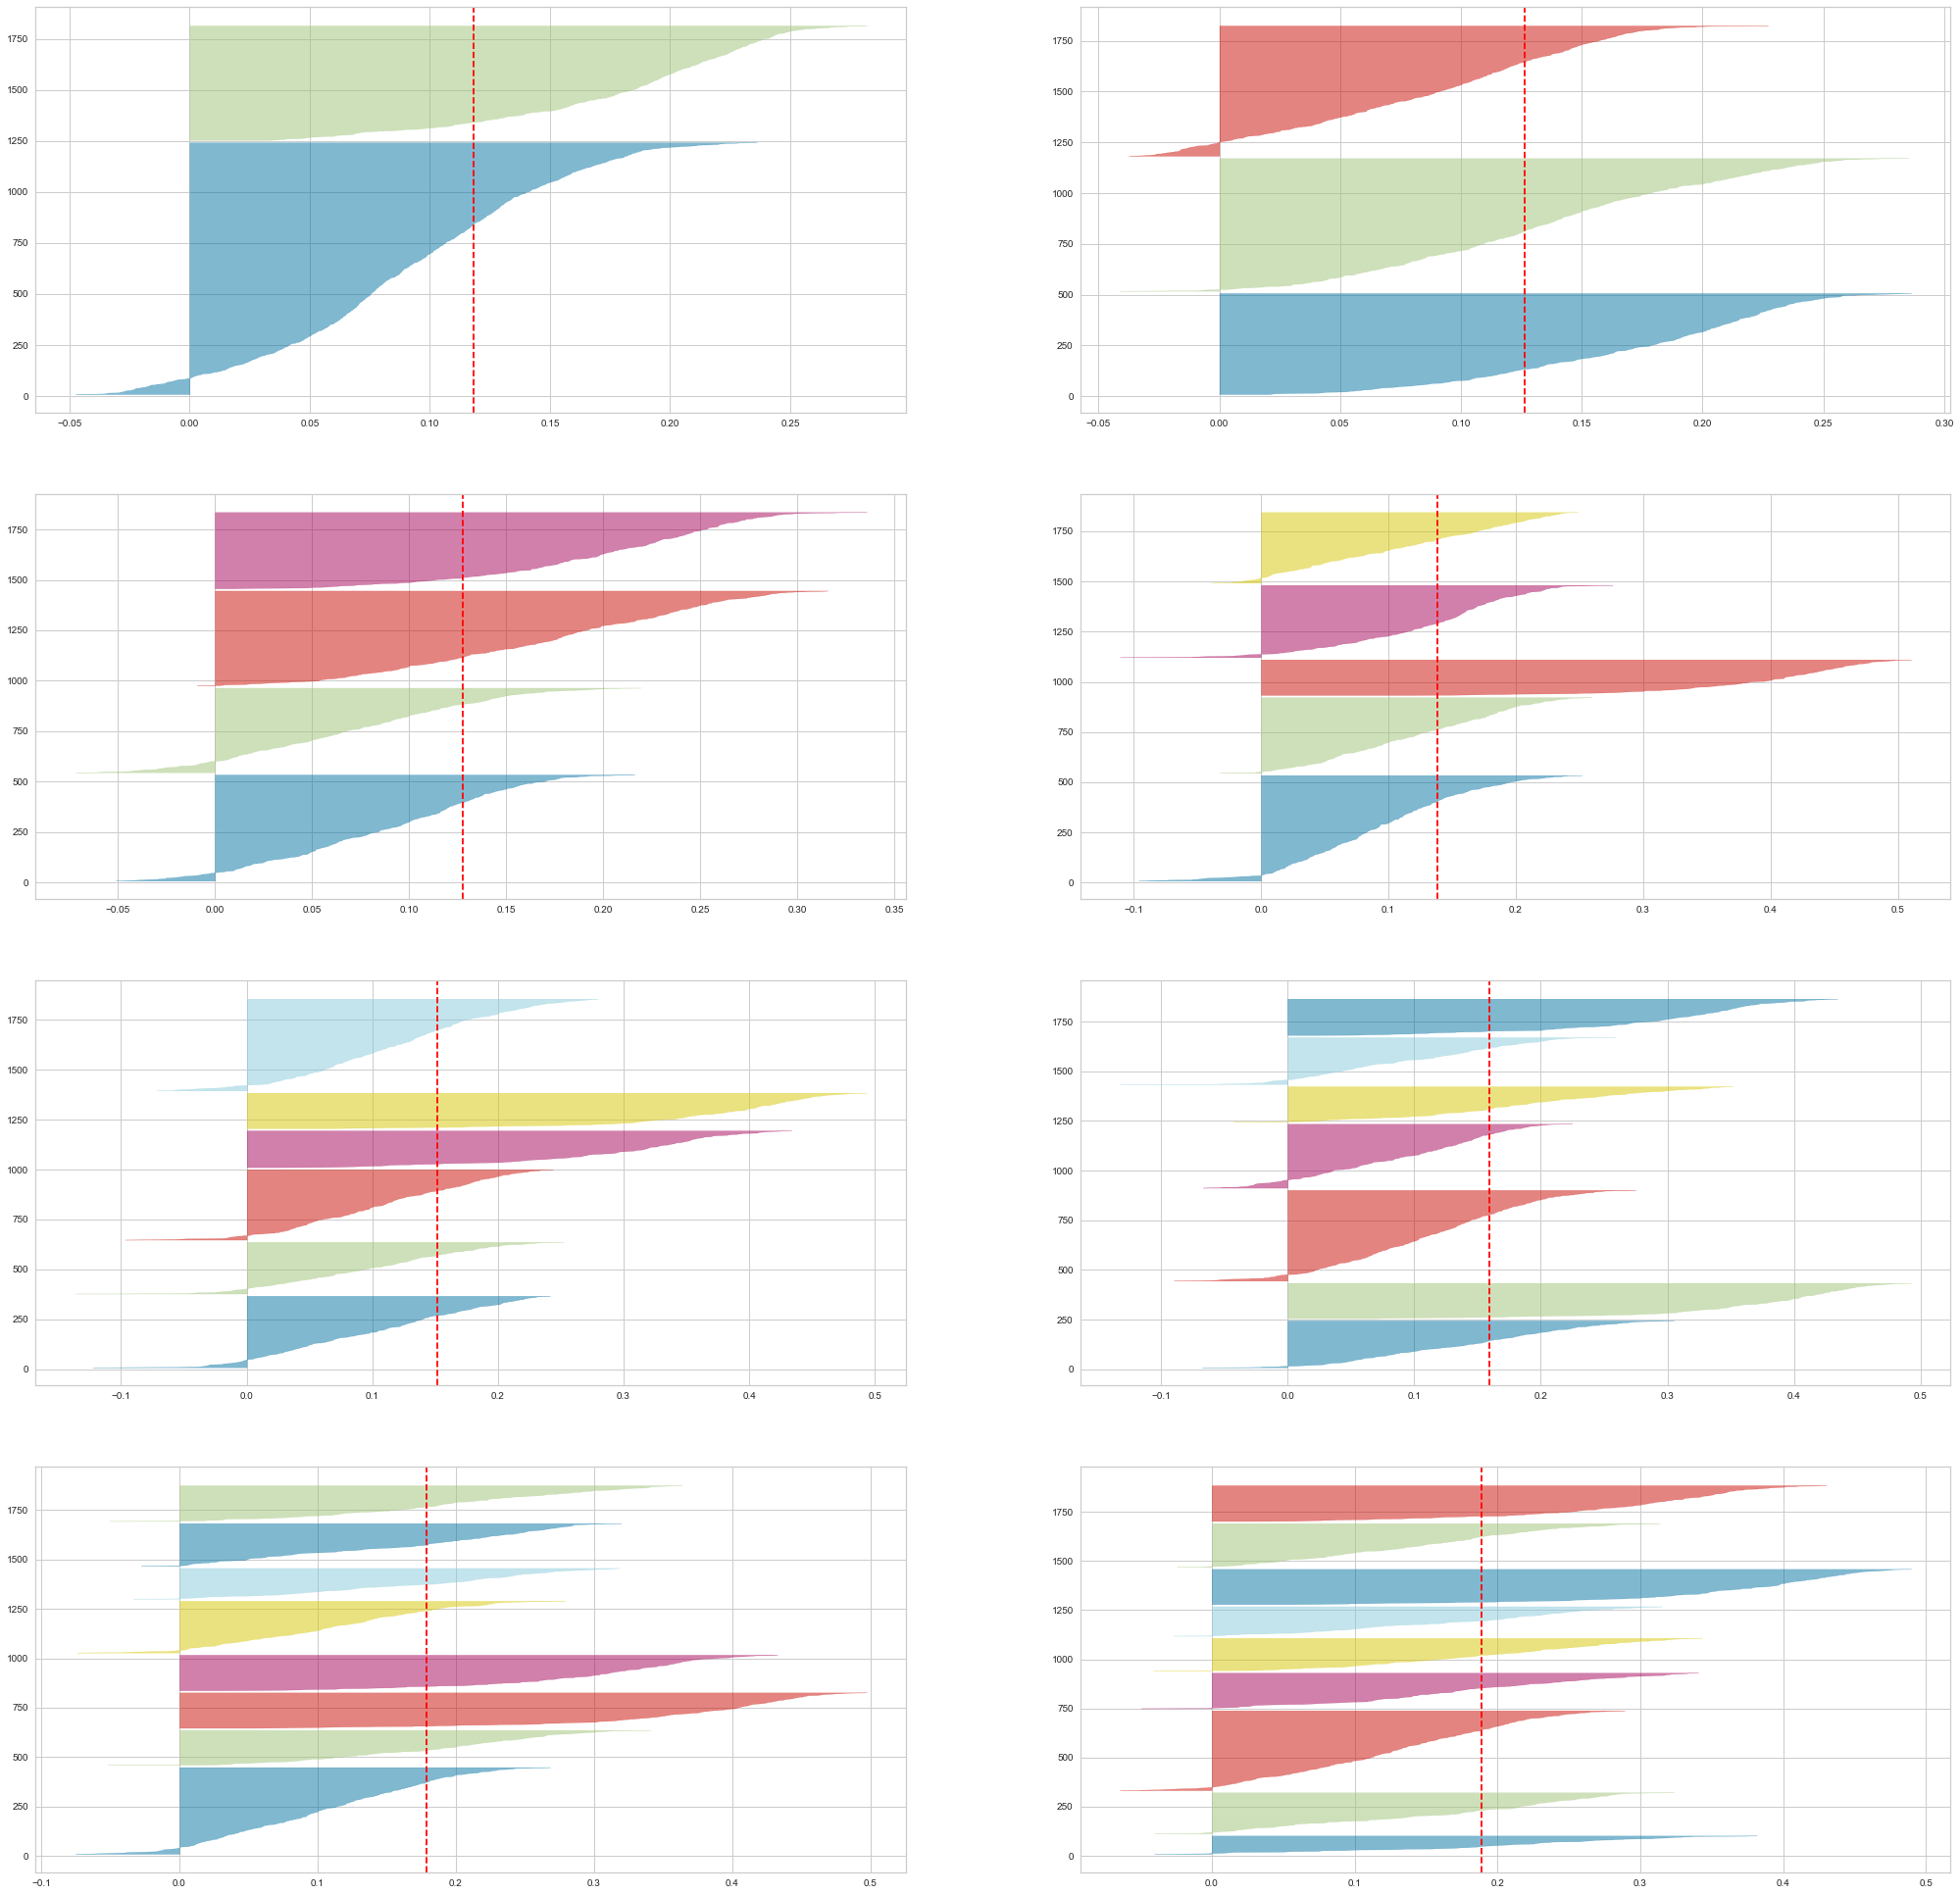

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(35,35))
for i in range (2,10):
    
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

For n_clusters = 2 The average silhouette_score is : 0.11832841100655983
For n_clusters = 3 The average silhouette_score is : 0.1265415792194053
For n_clusters = 4 The average silhouette_score is : 0.12801530390921514
For n_clusters = 5 The average silhouette_score is : 0.13717816072927472
For n_clusters = 6 The average silhouette_score is : 0.15115491877067683
For n_clusters = 7 The average silhouette_score is : 0.16177381269483868
For n_clusters = 8 The average silhouette_score is : 0.17880419723273033
For n_clusters = 9 The average silhouette_score is : 0.18914167962876496


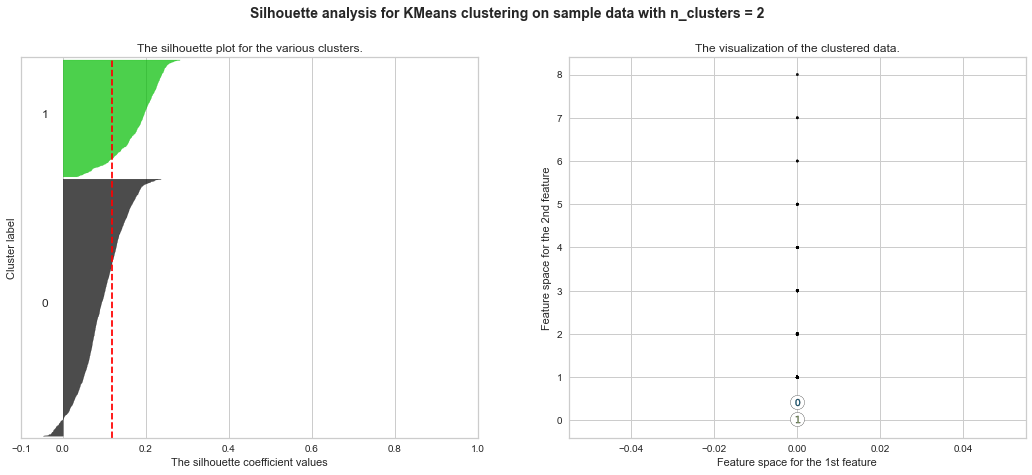

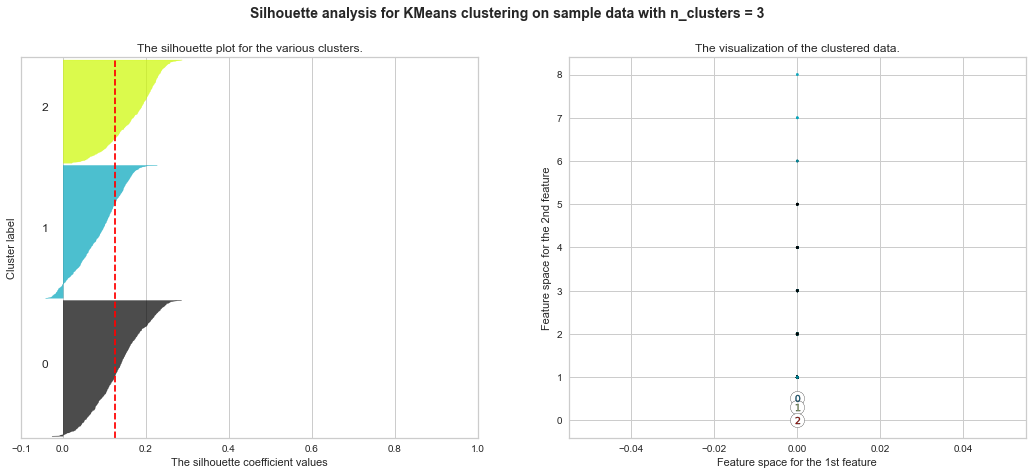

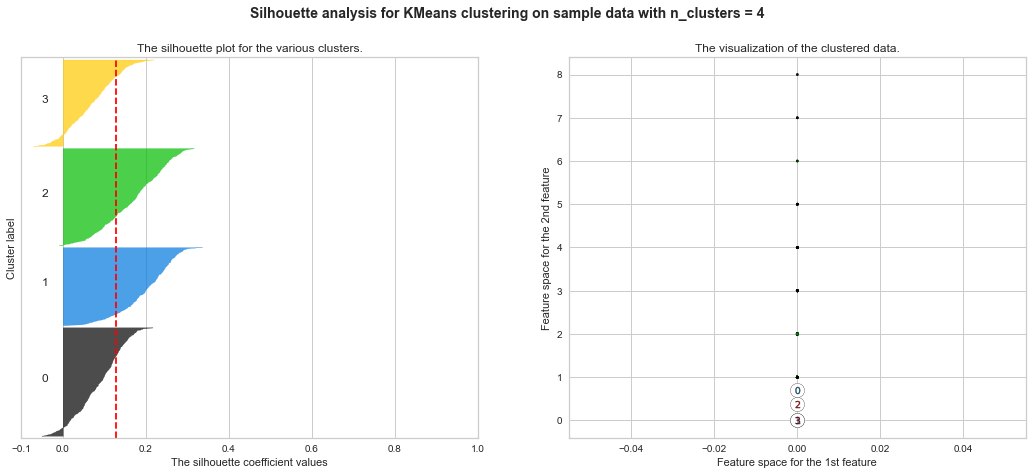

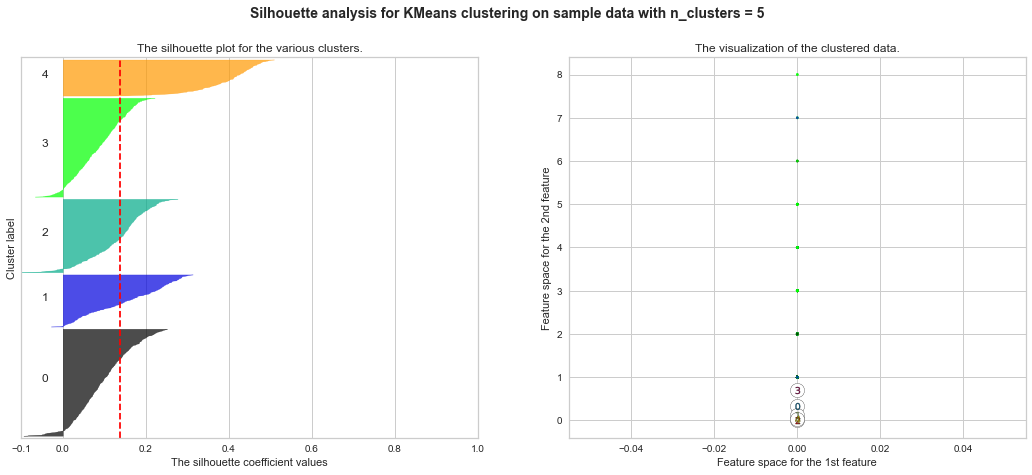

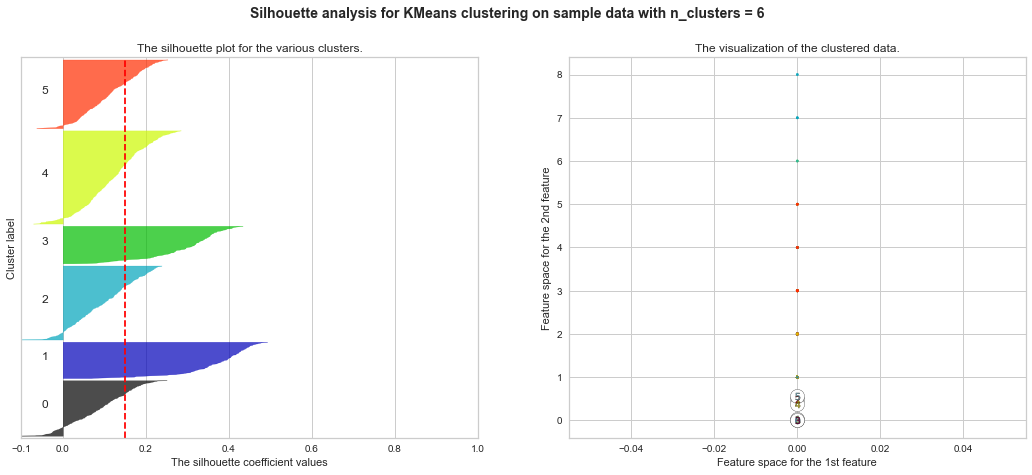

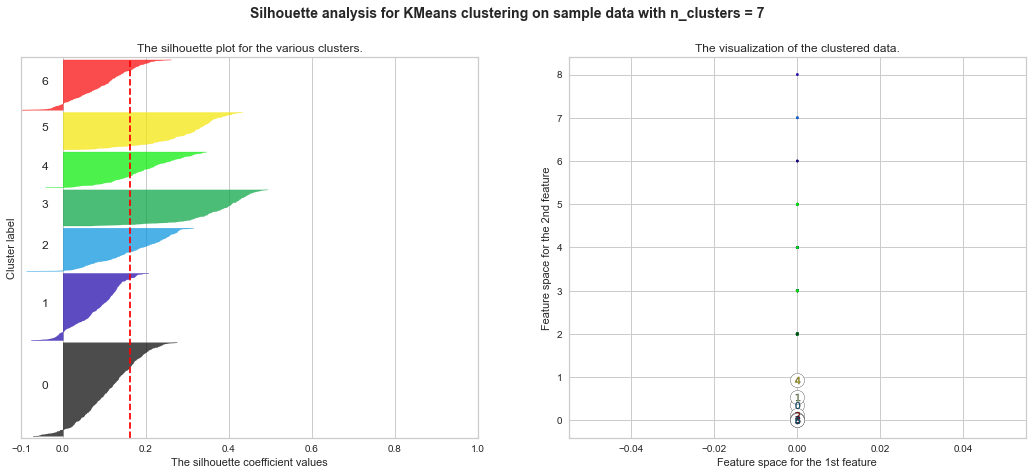

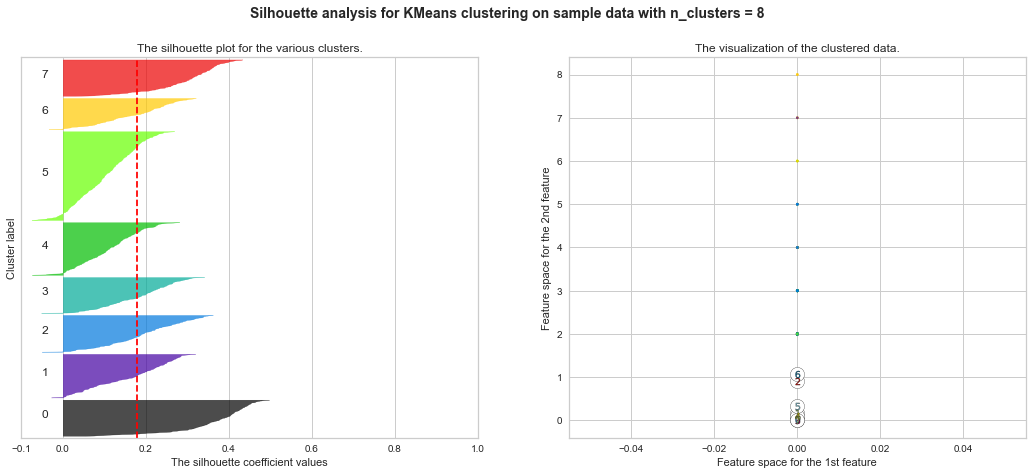

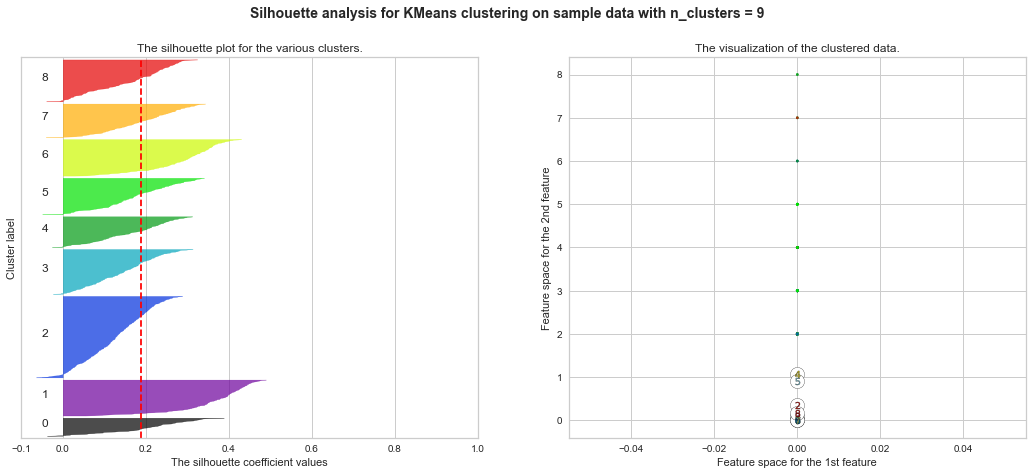

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
   
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

       
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

   
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    
    centers = clusterer.cluster_centers_
  
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

The value of n_clusters as 4 and 5 looks to be suboptimal for the given data due to the following reasons:
Presence of clusters with below-average silhouette scores 
Wide fluctuations in the size of the silhouette plots.
The value of 2 and 3 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. For the plot with n_cluster 3 (top right), the thickness is more uniform than the plot with n_cluster as 2 (top left) with one cluster thickness much more than the other. Thus, one can select the optimal number of clusters as 3.
Conclusions
Here is the summary of what you learned in this post in relation to silhouette score concepts:

Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.
Silhouette score takes into consideration the intra-cluster distance between the sample and other data points within the same cluster (a) and inter-cluster distance between the sample and the next nearest cluster (b).
The silhouette score falls within the range [-1, 1].
The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.
The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

Now we will use two popular algorithms: hierarchical clustering and $K$-means clustering. These and other algorithms are available in the `scikit-learn` module in the `cluster` submodule. Hierarchical clustering is called `AgglomerativeClustering`, and the $K$-means method is called `KMeans`.

**(0.5 points)** Use each of the two methods: hierarchical clustering and KMeans. Get the `X` array partition into 10 clusters.

- Note that `AgglomerativeClustering` does not have a `predict` method, so you can either use the `fit_predict` method or use the `fit` method and then look at the `labels_` attribute of the class instance.
- Kmeans performs multiple runs (default 10) with random centers and then returns the best partition in terms of average distance within the clusters. You can increase the number of runs to improve the quality of predictions in the `i_init` parameter.

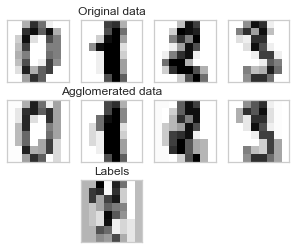

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)

agglo.fit(X)
X_reduced = agglo.transform(X)

X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)
plt.figure(1, figsize=(4, 3.5))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray_r, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title('Original data')
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray_r, vmax=16,
               interpolation='nearest')
    if i == 1:
        plt.title('Agglomerated data')
    plt.xticks(())
    plt.yticks(())

plt.subplot(3, 4, 10)
plt.imshow(np.reshape(agglo.labels_, images[0].shape),
           interpolation='nearest', cmap=plt.cm.gray_r)
plt.xticks(())
plt.yticks(())
plt.title('Labels')
plt.show()

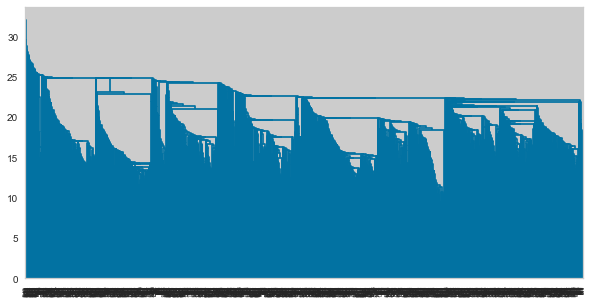

In [30]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist



np.random.seed(seed=42)

distance_mat = pdist(X) 

Z = hierarchy.linkage(distance_mat, 'single') 
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

In [31]:
kmeans_labels = cluster.KMeans(n_clusters = 10, n_init = 100).fit(X).labels_

In [32]:
digits = load_digits()
X, y = digits["data"], digits["target"]
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

In [33]:
kmeans_labels=kmeans.labels_
kmeans_labels.shape

(1797,)

In [34]:
from sklearn.cluster import AgglomerativeClustering, KMeans
agglo_cluster = AgglomerativeClustering(n_clusters = 10)
hierarchical_labels = agglo_cluster.fit_predict(X)
hierarchical_labels.shape

(1797,)

In [35]:
assert hierarchical_labels.shape == (1797,)
assert kmeans_labels.shape == (1797,)

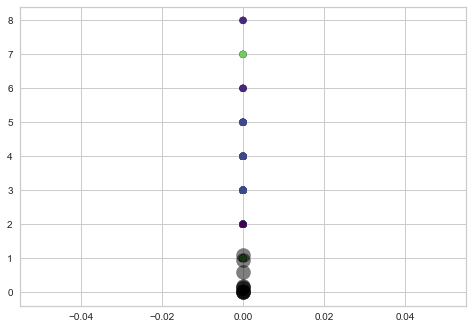

In [36]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.predict(X), s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**(0.5 points)** Visualize the centers of clusters obtained by both methods.

In [37]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [38]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

from sklearn.preprocessing import scale


data = scale(digits.data)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.33, random_state=42)


from sklearn import cluster


clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

clf.fit(X_train)

KMeans(n_clusters=10, random_state=42)

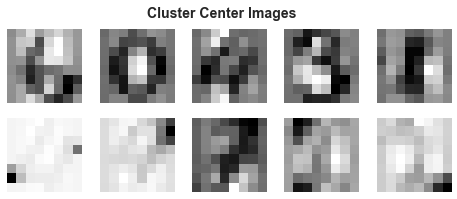

In [39]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    plt.axis('off')

plt.show()

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. Let's see what these cluster centers look like:

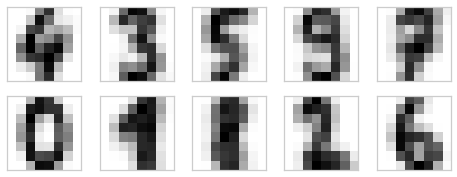

In [40]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [41]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits! Let's check the confusion matrix for this:

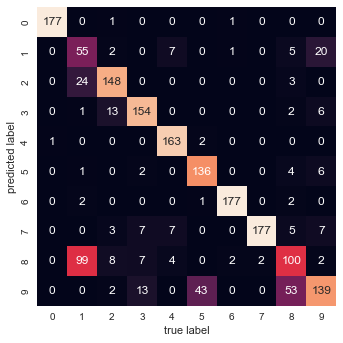

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In a situation where the true number of classes is unknown, we can select it by maximazing some metric.

When we can set some distance function between our observations, we can consider the `silhouette` distance as a function of measuring the quality of the clustering. Let's show how it is calculated:

Let $X$ – set of observations, $M \subset X$ – one of the clusters obtained as a result of clustering process, $\rho$ – some metric on $X$. Let's choose one observation $x \in M$. Denote $a(x)$ as the average distance from $x$ to  $x'$ points from the same cluster:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Denote $b(x)$ as minimun of average distances from $x$ to $x''$ from some other cluster $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

The silhouette is difference between a(x) and b(x), normalized to $[-1, \, 1]$ and averaged over all observations:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

The implementation of this metric in the `scikit-learn` is the `silhouette_score` function from the `metrics` submidule.

**(0.75 point)** For each $K$ between 2 and 20 inclusive, partition of the array $X$ into $K$ clusters using both methods. Calculate the silhouette score and visualize it for both methods on the same plot ($K$ on the $x$ axis and silhouette score on the $y$ axis). Sign the axes and make a legend.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


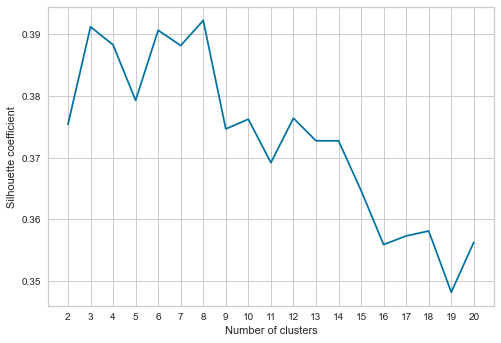

In [46]:
from sklearn.decomposition import PCA

silhouette_coefficients = []
pca = PCA(2)
scaled_data = pca.fit_transform(data)
for k in range(2, 21):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)


plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.legend()
plt.show()

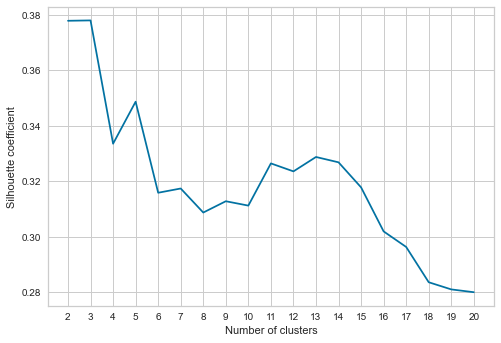

In [47]:
silhouette_coefficients = []


for k in range(2, 21):
    ac = cluster.AgglomerativeClustering(n_clusters=k)
    ac.fit(scaled_data)
    score = silhouette_score(scaled_data, ac.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

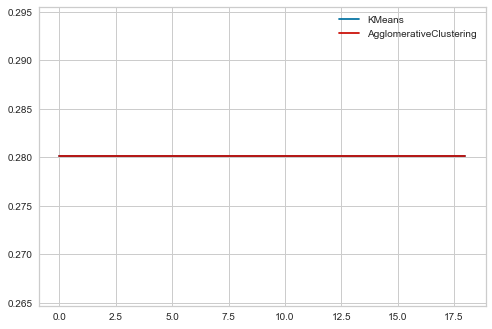

In [58]:
pca = PCA(2)
scaled_data = pca.fit_transform(data)
silhouette_coefficients1 = []
silhouette_coefficients2 = []
for k in range(2, 21):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    score1 = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients1.append(score)

    ac = cluster.AgglomerativeClustering(n_clusters=k)
    ac.fit(scaled_data)
    score2 = silhouette_score(scaled_data, ac.labels_)
    silhouette_coefficients2.append(score)
    
plt.plot(silhouette_coefficients1, 'b')
plt.plot(silhouette_coefficients1, 'r')
plt.legend(['KMeans', 'AgglomerativeClustering'])

When we know the true clustering labels, the clustering result can be compared to them using measures such as `homogeneity`, `completeness` and their harmonic mean - $V$-score. The definitions of these quantities are rather bulky and are based on the [entropy of the probability distribution](https://ru.wikipedia.org/wiki/Информационная_энтропия). Details are given in [this article](http://aclweb.org/anthology/D/D07/D07-1043.pdf). In practice, it's enough to know that `homogeneity`, `completeness` and $V$-score are in the range from 0 and 1, and the more, the better.

Since we know what digit each image is (`y` array), we can compare the clustering results to it using the measures listed above.

**(0.5 points)** Repeat the previous task using $V$-measure instead of silhouette.

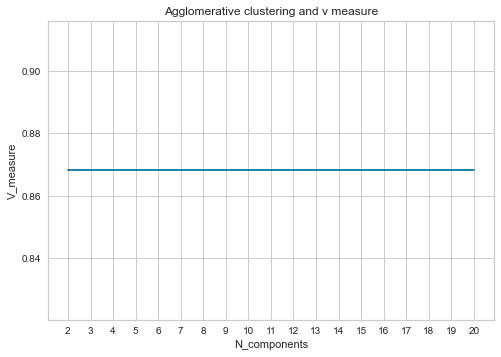

'v_coefficients:'

[0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083,
 0.8681701126909083]

In [59]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score

v_coefficients = []
n_components = range(2,21)
for n in n_components:
    
    y_pred = cluster.AgglomerativeClustering(n_clusters=10).fit_predict(X)
    score = v_measure_score(y, y_pred)
    v_coefficients.append(score)

plt.plot(n_components, v_coefficients)
plt.xticks(n_components)
plt.xlabel("N_components")
plt.ylabel("V_measure")
plt.title("Agglomerative clustering and v measure")
plt.show()
display("v_coefficients:", v_coefficients)

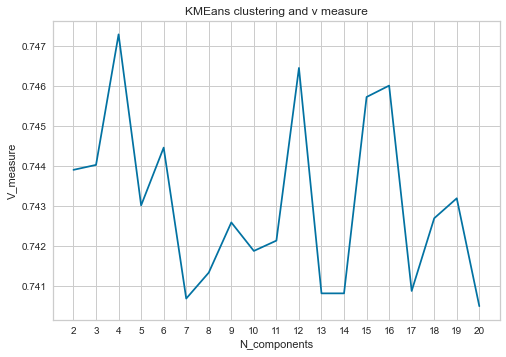

'v_coefficients:'

[0.7439004891712819,
 0.7440239832603223,
 0.7472819510019643,
 0.7430131529503573,
 0.7444558332677489,
 0.7406881347636757,
 0.7413355663017911,
 0.74258840202883,
 0.7418768046222265,
 0.7421344098411842,
 0.7464443013955782,
 0.7408180630672366,
 0.7408180630672364,
 0.745718567047697,
 0.7460029061637676,
 0.7408780597343179,
 0.7426924050876719,
 0.7431905379807568,
 0.7404984881083743]

In [61]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score

v_coefficients = []
n_components = range(2,21)
for n in n_components:
    
    y_pred = cluster.KMeans(n_clusters=10).fit_predict(X)
    score = v_measure_score(y, y_pred)
    v_coefficients.append(score)

plt.plot(n_components, v_coefficients)
plt.xticks(n_components)
plt.xlabel("N_components")
plt.ylabel("V_measure")
plt.title("KMEans clustering and v measure")
plt.show()
display("v_coefficients:", v_coefficients)

## 3. Feature space dimensionality reduction

In some cases, especially when there are a large number of features, when not all of them are informative, and some of them are correlated, it can be useful to reduce the dimension of the feature space. This mean that instead of $d$ original features, we will go to $d'\ll d$ new ones. And if earlier our data were presented in the form of an $n×d$ matrix, then it will presented as a $n×d'$.

There are two popular dimensionality reduction approaches:
- select new features from existing features;
- extract the new features by transforming old ones, for example, by making $d'$ different linear combinations of columns of an $n×d$ matrix.

One widely used dimensionality reduction technique is the Singular Value Decomposition (SVD). This method allows you to construct any number $d'\leq d$ of new features in such a way that they are the most informative (in some sense).

The `scikit-learn` module has several implementations of singular value decomposition. We will use the `TruncatedSVD` class from the `decomposition` submodule.

**Note:** The singular value decomposition of the matrix $M$ is usually written as $M=U \Sigma V^{*}$. `TruncatedSVD`, in turn, returns only the $d'$ first columns of the matrix $U$.

**(0.75 point)** Perform a singular value decomposition of the $X$ matrix, leaving 2, 5, 10, 20 features. In each case, perform hierarchical clustering and $K$-Means clustering (take the number of clusters equal to 10). Calculate the silhouette and $V$-score and compare them to corresponding values obtained from the original data.

**Note**: It is not valid to compare the silhouette calculated with different metrics. Even if we use the same metric function when calculating the distance between points in the data, after applying dimensionality reduction or other data transformations, we will (not always) get different silhouette scores. Therefore, after training the clustering algorithm, to compare the result of clustering, you need to calculate the silhouette on the original data.

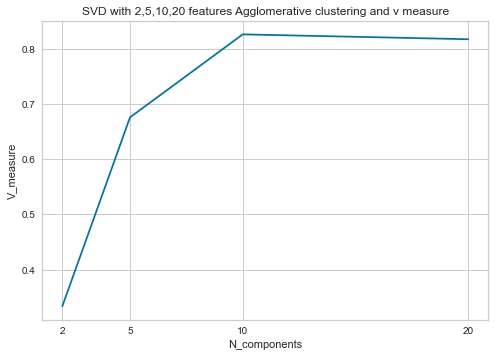

'v_coefficients:'

[0.3337189903948925,
 0.6756036446423491,
 0.8259753348813222,
 0.8171311050922185]

In [62]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score

v_coefficients = []
n_components = [2, 5, 10, 20]
for n in n_components:
    svd = TruncatedSVD(n_components=n)
    X_svd = svd.fit_transform(X)
    y_pred = cluster.AgglomerativeClustering(n_clusters=10).fit_predict(X_svd)
    score = v_measure_score(y, y_pred)
    v_coefficients.append(score)

plt.plot(n_components, v_coefficients)
plt.xticks(n_components)
plt.xlabel("N_components")
plt.ylabel("V_measure")
plt.title("SVD with 2,5,10,20 features Agglomerative clustering and v measure")
plt.show()
display("v_coefficients:", v_coefficients)

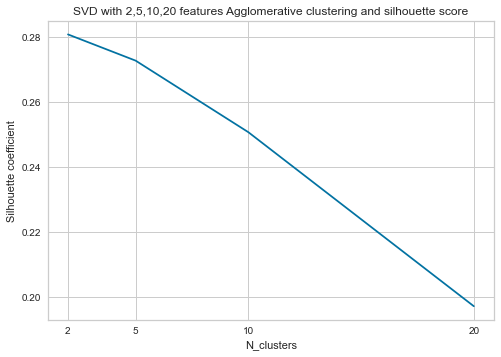

'silhouette_coefficients:'

[0.28081723073199744,
 0.27274121513142247,
 0.25071255273403703,
 0.1971359968038544]

In [63]:

silhouette_coefficients = []
n_components = [2, 5, 10, 20]
for n in n_components:
    svd = TruncatedSVD(n_components=n)
    X_svd = svd.fit_transform(X)
    score = silhouette_score(X_svd, cluster.AgglomerativeClustering(n_clusters=10).fit(X_svd).labels_)
    silhouette_coefficients.append(score)
    
plt.plot(n_components, silhouette_coefficients)
plt.xticks(n_components)
plt.xlabel("N_clusters")
plt.ylabel("Silhouette coefficient")
plt.title("SVD with 2,5,10,20 features Agglomerative clustering and silhouette score")
plt.show()
display("silhouette_coefficients:", silhouette_coefficients)

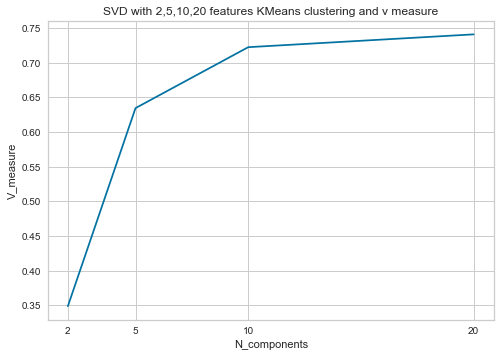

'v_coefficients:'

[0.3488978172599144,
 0.6343478382866305,
 0.7221657886010594,
 0.7406391563296724]

In [64]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score

v_coefficients = []
n_components = [2, 5, 10, 20]
for n in n_components:
    svd = TruncatedSVD(n_components=n)
    X_svd = svd.fit_transform(X)
    y_pred = cluster.KMeans(n_clusters=10).fit_predict(X_svd)
    score = v_measure_score(y, y_pred)
    v_coefficients.append(score)

plt.plot(n_components, v_coefficients)
plt.xticks(n_components)
plt.xlabel("N_components")
plt.ylabel("V_measure")
plt.title("SVD with 2,5,10,20 features KMeans clustering and v measure")
plt.show()
display("v_coefficients:", v_coefficients)

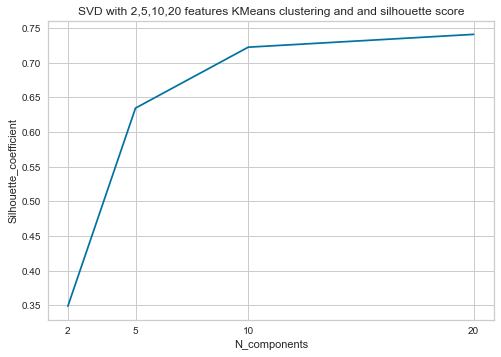

'silhouette_coefficients:'

[0.34894042072331305,
 0.3122881708521923,
 0.2630957989367177,
 0.21235424323320373]

In [65]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score

silhouette_coefficients = []
n_components = [2, 5, 10, 20]
for n in n_components:
    svd = TruncatedSVD(n_components=n)
    X_svd = svd.fit_transform(X)
    y_pred = cluster.KMeans(n_clusters=10).fit_predict(X_svd)
    score = silhouette_score(X_svd, cluster.KMeans(n_clusters=10).fit(X_svd).labels_)
    silhouette_coefficients.append(score)
    
plt.plot(n_components, v_coefficients)
plt.xticks(n_components)
plt.xlabel("N_components")
plt.ylabel("Silhouette_coefficient")
plt.title("SVD with 2,5,10,20 features KMeans clustering and and silhouette score")
plt.show()
display("silhouette_coefficients:", silhouette_coefficients)

Another popular dimensionality reduction approach that is useful for working with images is t-distributed stochastic neighbor embeddings, abbreviated `tSNE`. Unlike singular value decomposition, this it is non-linear transformation. It's main idea is to map points from a space of dimension `d` to another space of dimension 2 or 3 in such a way that the distances between points are mostly preserved. Mathematical details can be found, for example, [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

The implementation of `tSNE` in the `scikit-learn` library is the `TSNE` class in the `manifold` submodule.

**Note:** In recent years [UMAP](https://github.com/lmcinnes/umap) is often used istead of `tSNE`. It is a faster algorithm with similar properties. We don't ask you to use `UMAP` because it requires you to install another dependency, the `umap-learn` library. Those who wish can perform the following task using `UMAP`.

**(0.5 points)** Perform a tSNE-transform of the `X` matrix, leaving 2 features. Visualize the obtained data in the form of a scatter plot form: the first feature on the horizontal axis, and the second one the vertical axis. Color the points according to the digits they belong to.

- The `c` parameter in the plt.scatter function is responsible for the color of the points. Pass the true labels to it.

In [66]:
from sklearn.manifold import TSNE
model = TSNE()
a = model.fit_transform(X)

C:\Users\НР\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\НР\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


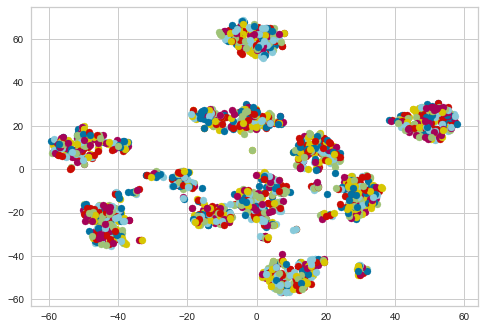

In [67]:
for i in range(len(a)):
    plt.scatter(a[i][0], a[i][1])

In [68]:
import numpy as np
from sklearn.manifold import TSNE


X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

C:\Users\НР\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\НР\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1797, 2)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections, x=0, y=1,
    color=digits.target.astype(str), labels={'color': 'digit'}
)
fig.show()

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)


labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]


accuracy_score(digits.target, labels)

That's nearly 92% classification accuracy without using the labels. This is the power of unsupervised learning when used carefully: it can extract information from the dataset that it might be difficult to do by hand or by eye.

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

In [ ]:
tsne = TSNE(n_components=2, random_state=SEED)
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections, x=0, y=1,
    color=digits.target.astype(str), labels={'color': 'digit'}
)
fig.show()

**(0.5 points)** From the data transformed using the tSNE, perform hierarchical clustering and $K$-means clustering (take the number of clusters equal to 10). Calculate the silhouette and the $V$-score and compare them to corresponding values obtained from the original data.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score


X_tsne = TSNE().fit_transform(X)

display("silhouette_score for AgglomerativeClustering:",
        silhouette_score(X_tsne, AgglomerativeClustering(n_clusters = 10).fit_predict(X_tsne), metric='euclidean'))
display("silhouette_score for KMeans Clustering:",
        silhouette_score(X_tsne, KMeans(n_clusters = 10, n_init = auto, random_state=42).fit_predict(X_tsne), metric='euclidean'))
display("v_measure_score for AgglomerativeClustering:",
        v_measure_score(y, AgglomerativeClustering(n_clusters = 10).fit_predict(X_tsne)))
display("v_measure_score for KMeans Clustering:",
        v_measure_score(y, KMeans(n_clusters = 10, n_init = auto, random_state=42).fit_predict(X_tsne)))


In [ ]:
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results


**(0.25 points)** Choose the best partition (in terms of silhouette or $V$-score) and visualize the centers of clusters with images. Did you managed to make each digit correspond to one center of the cluster?

In [ ]:
alpha = plt.figure(figsize=(15, 10))
plt.scatter((X_tsne.T[0]).T, (X_tsne.T[1]).T, c = AgglomerativeClustering(n_clusters = 10).fit_predict(X_tsne), alpha=1, cmap='jet')
plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.show()

In [ ]:
for i in list(range(1, 11)):
    centers(i, X, AgglomerativeClustering(n_clusters = 10).fit_predict(X_tsne), i-1)

## 4. Results and bonus part

Write in free form what conclusions you made after completing this assignment. Answer the following questions:

**(0.5 points)** Which algorithm gives more meaningful results - hierarchical clustering or $K$- means clustering. Does it depend on the algorithm settings or on the quality evaluation method?

Качество алгоритма K-средних намного выше

**(0.5 points)** Imagine the situation where after hierarchical clustering, you need to cluster new data in the same way without retraining the model. Suggest a method how you will do it and how you will measure the quality of clustering of new data.

TSNE метод будет наилучшим решением в данном случае

**(0.5 points)** Does dimensionality reduction improve clustering results?

TSNE повышает качество кластеризации, при этом можно снизить размерность  без потери качества

**(0.5 points)** How to evaluate the quality of dimensional reduction? Suggest at least 2 options.

Размерность признакового пространства - 64. Снизим размерность всего до 2 и увидим, что даже на глаз рукописные цифры неплохо разделяются на кластеры.

In [ ]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

с t-SNE картинка получается еще лучше, поскольку у PCA ограничение – он находит только линейные комбинации исходных признаков. Зато даже на этом относительно небольшом наборе данных можно заметить, насколько t-SNE дольше работает.

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

В данном случае для этого достаточно выделить 21 главную компоненту, то есть снизить размерность с 64 признаков до 21.

In [ ]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

**(Bonus 2 points)** Load the [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist) dataset. You can also do it with `scikit-learn` as explained [here](https://stackoverflow.com/a/60450028). Explore the data and try to cluster it using different approaches. Compare results of these approaches using the silhouette and the $V$-score.

In [ ]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
display(len(np.unique(y)))

In [ ]:
display("silhouette_score:", silhouette_score
        (X, KMeans(n_clusters = 10, n_init = 200, random_state=42).fit_predict(X), metric='euclidean'))
display("v_measure_score:", v_measure_score
        (X, KMeans(n_clusters = 10, n_init = 200, random_state=42).fit_predict(X), metric='euclidean'))